# An Introduction to Gradient Descent w. Linear Regression

Gradient descent is one of those “greatest hits” algorithms that can offer a new perspective for solving problems. Unfortunately, it’s rarely taught in undergraduate computer science programs. In this post I’ll give an introduction to the gradient descent algorithm, and walk through an example that demonstrates how gradient descent can be used to solve machine learning problems such as linear regression.

Gradient descent is _**widely**_ used in Machine Learning and Deep Learning

In [201]:
import pandas as pd
import numpy as np
import altair as alt

In [202]:
###########
# actual data
###########

data = pd.read_csv('demo.txt')

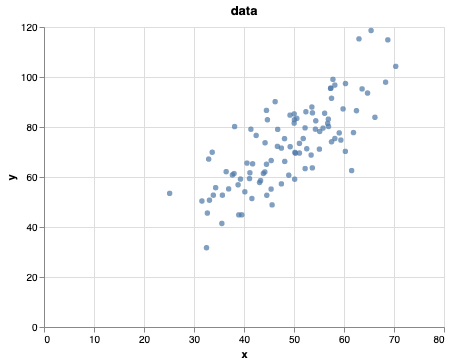

In [203]:
scatter = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q'
).properties(
    title='data'
)
scatter

# Our goal is to align a line to this dataset

- why would we want to do that?
 - we can use this to infer properties of the dataset
 - we can use it to predict future behaviour (extrapolate)

In [236]:
from sklearn import linear_model
from sklearn import model_selection
model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = model_selection.train_test_split(data['x'], data['y'], test_size=0.2, random_state=0)

model.fit(X_train.values.reshape(-1, 1), y_train)

#For retrieving the slope:
print("""
Model intercept (position of the line) \n{:.2f}
Model coefficients (slope of the line) \n{:.2f}
Model score (how close are we to fit a line to the data) \n{:.2f}
""".format(
    model.intercept_,
    model.coef_[0],
    model.score(X_test.values.reshape(-1, 1), y_test)))


Model intercept (position of the line) 
6.69
Model coefficients (slope of the line) 
1.35
Model score (how close are we to fit a line to the data) 
0.27



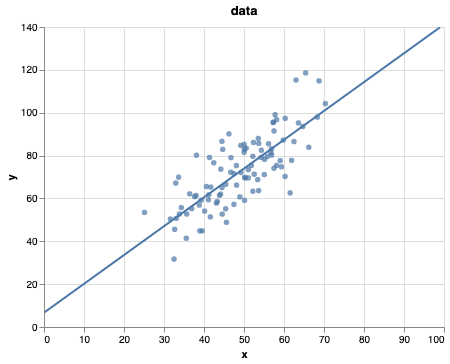

In [252]:
def make_line_using(m, b):
    # y = m * x + b
    x = np.arange(100)
    y = m * x + b
    df = pd.DataFrame(np.matrix([x,y]).T, columns=['x','y'])
    line = alt.Chart(df).mark_line().encode(
        x='x:Q',
        y='y:Q',
        tooltip=[alt.Tooltip('y', title='b * x + m')]
    ).interactive()
    return (scatter + (line))



m_guess = model.coef_[0]
b_guess = model.intercept_
make_line_using(m_guess, b_guess)

# Now let's try to implement this ourselves!

### Naive approach to guess until we get a good fit
guessing the beta parameters linear equation


$ y = m \times \mathbf{x} + b$

In [269]:
def plot_on_top_of_data(m, b):
    # y = B_2 * x + B_1
    x = np.arange(100)
    y = b * x + m
    df = pd.DataFrame(np.matrix([x,y]).T, columns=['x','y'])
    line = alt.Chart(df).mark_line().encode(
        x='x:Q',
        y='y:Q'
    )
    return (scatter + (line))

Our guess

$ y = 2 \times \mathbf{x} + 1$

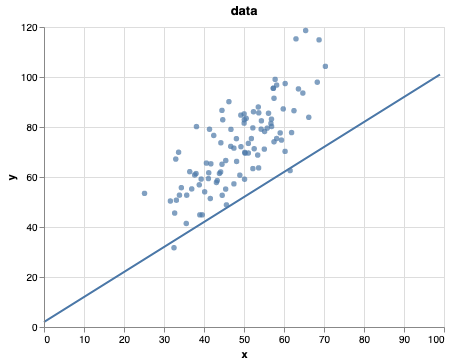

In [270]:
m_guess = 2
b_guess = 1
plot_on_top_of_data(m_guess, b_guess)

#### Not the most sufficient algorithm but might work. 

hmmmmmm ¯\\_(ツ)_/¯
let's think of another approach.

> Can we we somehow see if we have a good guess?

# Let's improve our guessing strategy using Gradient Descent

**Gradient descent** is an optimization algorithm used to **minimize some function (loss function)** by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

![landscape](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png)



Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. 
We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum.

![winner](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)

[math.stackexchange - Partial derivative in gradient descent](https://math.stackexchange.com/a/1695446/196117)

[ml-cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

## Let's introduce the loss function (or cost/error)

A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The loss function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$



Given ${\displaystyle n}$ predictions generated to ${\hat{Y}}$, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted.

---
Our example with 
$ \hat{Y} = mx_i + b$

Now let’s run gradient descent using our new loss function. There are two parameters in our lost function we can control: m (weight) and b (bias). 

Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the loss function with respect to each parameter and store the results in a gradient.



Given the loss function:

$ f(m,b) =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $

The gradient can be calculated as:

$ \begin{split}f'(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
    \end{bmatrix}\end{split}
$

In [255]:
def step_gradient(m: int, b: int, points: np.ndarray, learning_rate: float) -> list:
    """
    this calculates the gradient step of a **linear function**
    WILL NOT WORK for multiple dimensional data,
    since the derivates will be on matricies instead
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m * x) + b))
        m_gradient += -(2/N) * x * (y - ((m * x) + b))
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)
    return [b, m]

In [256]:
new_b, new_m = step_gradient(m_guess, b_guess, data.values, learning_rate)
new_b, new_m

(6.6874785109966535, 1.3465666635682905)

In [257]:
# Let's run through it through the whole dataset

In [258]:
def gradient_descent_runner(points, starting_m, starting_b, learning_rate, num_iterations):
    m = starting_m
    b = starting_b
    for i in range(num_iterations):
        m, b = step_gradient(m, b, np.array(points), learning_rate)
    return [m, b]

In [261]:
number_iterations = 10000
[m, b] = gradient_descent_runner(
    data, 
    m_guess, 
    b_guess, 
    learning_rate, 
    number_iterations
)

In [264]:
print("Starting gradient descent at guess_m = {0}, guess_b = {1}".format(
    m_guess, 
    b_guess
))
print("Last gradient descent at guess_m = {0}, guess_b = {1}".format(
    m, 
    b
))


Starting gradient descent at guess_m = 1.3450919020620442, guess_b = 6.687439682550092
Last gradient descent at guess_m = 1.4510680203998683, guess_b = 1.4510195909326549


In [273]:
def compute_error_for_line(m, b, points):
    total_error = 0
    # sum (y_i - y_hat_i) ^ 2
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2
    # 1 / n
    mse = total_error / float(len(points))
    return mse

In [275]:
# lets see how bad our guess was

compute_error_for_line(m_guess, b_guess, data.values)

838.9099083602013

In [277]:
print("Starting gradient descent at \n guess_m = {0}, guess_b = {1}, error {2}".format(
    m_guess, 
    b_guess,
    compute_error_for_line(m_guess, b_guess, data.values)
))
print("Last gradient descent at \n guess_m = {0}, guess_b = {1}, error {2}".format(
    m, 
    b,
    compute_error_for_line(m, b, data.values)
))


Starting gradient descent at 
 guess_m = 2, guess_b = 1, error 838.9099083602013
Last gradient descent at 
 guess_m = 1.4510680203998683, guess_b = 1.4510195909326549, error 111.87217648730648


# How does gradient descent work?
---
In it's most general form:

Gradient descent is based on the observation that if the multi-variable function ${\displaystyle F(\mathbf {x} )}$ is defined and differentiable in a neighborhood of a point ${\displaystyle \mathbf {a} }$ , then ${\displaystyle F(\mathbf {x} )}$ decreases fastest if one goes from ${\displaystyle \mathbf {a} }$  in the direction of the negative gradient of ${\displaystyle F}$ at ${\displaystyle,-\nabla F(\mathbf {a} )}$. It follows that, if



${\displaystyle \mathbf {a} _{n+1}=\mathbf {a} _{n}-\gamma \nabla F(\mathbf {a} _{n})}$

for ${\displaystyle \gamma \in \mathbb {R} _{+}}$ small enough, then ${\displaystyle F(\mathbf {a_{n}} )\geq F(\mathbf {a_{n+1}} )}$. In other words, the term ${\displaystyle \gamma \nabla F(\mathbf {a} )}$ is subtracted from ${\displaystyle \mathbf {a} }$  because we want to move against the gradient, toward the minimum.

Here we have defined and the algorith works with contraints:


**learning rate** ${\gamma}$, for small ${\displaystyle \gamma \in \mathbb {R} _{+}}$


**function** $F(\mathbf{x})$,  if differentiable; then ${\displaystyle F(\mathbf {a_{n}} )\geq F(\mathbf {a_{n+1}} )}$

**Leading to** ($\leadsto $) a monotonic sequence $F(\mathbf {x} _{0})\geq F(\mathbf {x} _{1})\geq F(\mathbf {x} _{2})\geq \cdots,$

# Coming back to the real world

Scikit learn provides you two approaches to linear regression:

If you can decompose your loss function into additive terms, then stochastic approach is known to behave better (thus SGD) and if you can spare enough memory - OLS method is faster and easier (thus first solution).

1) `LinearRegression` object uses **Ordinary Least Squares** solver from scipy, as LR is one of two classifiers which have closed form solution. Despite the ML course - you can actually learn this model by just inverting and multiplicating some matrices.

2) `SGDRegressor` which is an implementation of **stochastic gradient descent**, very generic one where you can choose your penalty terms. To obtain linear regression you choose loss to be L2 and penalty also to none (linear regression) or L2 (Ridge regression)

The "gradient descent" is a major part of most learning algorithm. What you will see most often is a improved version of the algorithm **Stochastic Gradient Descent**.


source - [linear regression scitkit](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)